In [2]:
%run _bootstrap.py
%load_ext autoreload
%autoreload 2

In [3]:

import matplotlib.pyplot as plt
from src.data_loader import get_asset_df
from src.features import add_log_return, add_rolling_stats, add_zscore
from src.signal_logic import signal_from_zscore
from src.config import cfg   

# 1. Load data and compute features
df = get_asset_df("BTC/USDT")                # 30m bars
df = add_log_return(df)                     
df = add_rolling_stats(df, lookback=96)     
df = add_zscore(df, lookback=96)            

# 2. Generate signals (using your params.yaml defaults)
signals = signal_from_zscore(df)             

# 3. Inspect last few entries
display(
    df[['close', 'zscore']].tail(),
    signals.tail()
)


ModuleNotFoundError: No module named 'src'

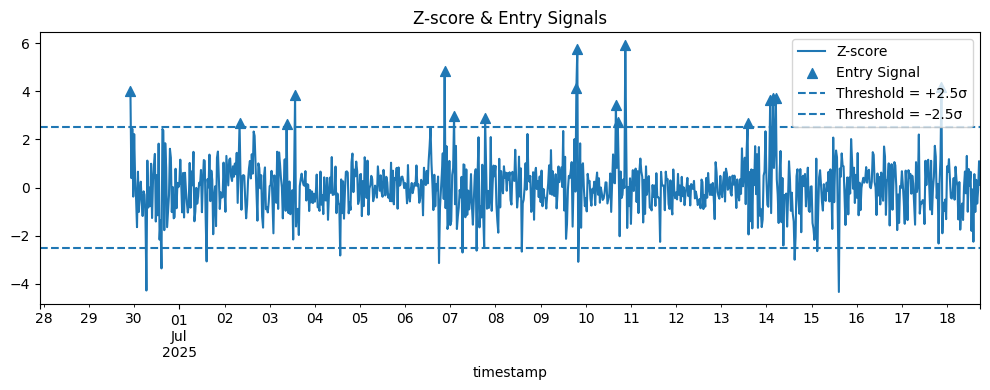

In [11]:
plt.figure(figsize=(10, 4))
ax = df['zscore'].plot(label='Z-score')
ax.scatter(df.index[signals], df['zscore'][signals],
           marker='^', s=50, label='Entry Signal')

# CORRECTLY fetch threshold as a float
th = cfg().get('zscore', {}).get('threshold', 2.5)

plt.axhline(th, linestyle='--', label=f'Threshold = +{th}σ')
plt.axhline(-th, linestyle='--', label=f'Threshold = –{th}σ')

plt.legend()
plt.title("Z-score & Entry Signals")
plt.tight_layout()
plt.show()